## Analyze the power consumption behavior across the different sectors in the following six states of US – Maryland, Massachusetts, Florida, Colorado, California and Washington

#### Data Source:

Temperature data: 
https://www.ncdc.noaa.gov/cag/statewide/time-series

Power consumption/retail sales of power: https://www.eia.gov/electricity/data/browser/#/topic/5?agg=0,1&geo=vvvvvvvvvvvvo&endsec=vg&linechart=ELEC.SALES.TX-ALL.M~ELEC.SALES.TX-RES.M~ELEC.SALES.TX-COM.M~ELEC.SALES.TX-IND.M&columnchart=ELEC.SALES.TX-ALL.M~ELEC.SALES.TX-RES.M~ELEC.SALES.TX-COM.M~ELEC.SALES.TX-IND.M&map=ELEC.SALES.US-ALL.M&freq=M&start=200101&end=202009&ctype=linechart&ltype=pin&rtype=s&maptype=0&rse=0&pin=

#### Overview of the data:

Data consists of the power consumption by the Residential, Commercial, transportation, industrial sectors over the last 20 years. I plan to merge this data with the respective average statewide temperature data during 2001- 2020 time period.

I propose the combined data to consist of the following 12 columns:

•	Year: The year of the observation

•	Month: Month of the observation

•	All: All the sectors power consumption value

•	Residential: Power consumption by the residential sector

•	Commercial: Power consumption by the commercial sector

•	Industrial: Power consumption by the industrial sector

•	Transportation: Power consumption by the transportation sector

•	Other: Power consumption by the other miscellaneous sectors

•	State: State value of the observation

•	Source key: Source of the observation

•	Units: Units of the power consumption

•	Temperature: Average temperature of the state

Total size of the data is 3 MB. It consists of 1422 records.

#### Proposed objectives of the project:

•	Clean the data to address missing values, data types etc.

•	As the data file contains all the states data, I shall extract Maryland, Massachusetts, Florida, Colorado, California and Washington specific electricity consumption grouped by sector.

•	Load and transform the monthly temperature data of various locations and finally merge it with the power consumption dataset.

•	Perform exploratory data analysis of the features present in the combined dataset.

•	Then, analyze how the energy consumption varies across each sector with change in atmospheric temperatures in states across east coast, middle and the west coast.

•	Additionally, compare the previous year power consumption behavior with the current year and how the usage has changed due to the pandemic.

•	Finally, analyze the auto-correlation and correlation between the major sector’s power consumption with temperature.

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import time

In [2]:
print('\nPandas version: ',pd.__version__)
print('Matplotlib version: ',matplotlib.__version__)
print('Seaborn version: ',sns.__version__)


Pandas version:  1.1.3
Matplotlib version:  3.3.2
Seaborn version:  0.11.0


In [3]:
# Checking the encoding type of the file
import chardet

with open("Retail_sales_of_electricity.csv","rb") as fraw:
    file_content = fraw.read()

In [4]:
chardet.detect(file_content)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

Noticed that the file is encodded as ascii value with a confidence of 100%

## Extracting and cleaning the data

In [5]:
start_time_before_load_file = time.time()
power_consumption_data = pd.read_csv("Retail_sales_of_electricity.csv",skiprows=4)
print("Time taken to load the file in seconds: ", round(time.time()-start_time_before_load_file,3) )

Time taken to load the file in seconds:  0.212


In [6]:
power_consumption_data.head()

,description,units,source key,Jan 2001,Feb 2001,Mar 2001,Apr 2001,May 2001,Jun 2001,Jul 2001,...,Dec 2019,Jan 2020,Feb 2020,Mar 2020,Apr 2020,May 2020,Jun 2020,Jul 2020,Aug 2020,Sep 2020
0,Retail sales of electricity,million kilowatthours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,United States,million kilowatthours,ELEC.SALES.US-ALL.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,United States : all sectors,million kilowatthours,ELEC.SALES.US-ALL.M,310816,272335,269298,254391,264490,290008,315798,...,309823,311361,290109,285085,258145,270486,315628,374716,363990,317796
3,United States : residential,million kilowatthours,ELEC.SALES.US-RES.M,127066,99878,92805,82454,81731,99407,120707,...,121078,124414,111931,104006,97465,105412,131242,166891,158821,127584
4,United States : commercial,million kilowatthours,ELEC.SALES.US-COM.M,90825,81467,84064,81061,87471,95658,102156,...,108001,108857,101905,102937,90631,93406,108695,125994,122025,112214


In [7]:
# Dropping the first two rows it does not contain power consumption data
power_consumption_data = power_consumption_data.drop([0,1])

In [8]:
power_consumption_data.head(4)

,description,units,source key,Jan 2001,Feb 2001,Mar 2001,Apr 2001,May 2001,Jun 2001,Jul 2001,...,Dec 2019,Jan 2020,Feb 2020,Mar 2020,Apr 2020,May 2020,Jun 2020,Jul 2020,Aug 2020,Sep 2020
2,United States : all sectors,million kilowatthours,ELEC.SALES.US-ALL.M,310816,272335,269298,254391,264490,290008,315798,...,309823,311361,290109,285085,258145,270486,315628,374716,363990,317796
3,United States : residential,million kilowatthours,ELEC.SALES.US-RES.M,127066,99878,92805,82454,81731,99407,120707,...,121078,124414,111931,104006,97465,105412,131242,166891,158821,127584
4,United States : commercial,million kilowatthours,ELEC.SALES.US-COM.M,90825,81467,84064,81061,87471,95658,102156,...,108001,108857,101905,102937,90631,93406,108695,125994,122025,112214
5,United States : industrial,million kilowatthours,ELEC.SALES.US-IND.M,83477,82248,83522,82253,86097,85269,83176,...,80095,77426,75650,77565,69591,71220,75211,81276,82582,77505


In [9]:
power_consumption_data.set_index("description").transpose()

description,United States : all sectors,United States : residential,United States : commercial,United States : industrial,United States : transportation,United States : other,New England,New England : all sectors,New England : residential,New England : commercial,...,Alaska : industrial,Alaska : transportation,Alaska : other,Hawaii,Hawaii : all sectors,Hawaii : residential,Hawaii : commercial,Hawaii : industrial,Hawaii : transportation,Hawaii : other
units,million kilowatthours,million kilowatthours,million kilowatthours,million kilowatthours,million kilowatthours,million kilowatthours,million kilowatthours,million kilowatthours,million kilowatthours,million kilowatthours,...,million kilowatthours,million kilowatthours,million kilowatthours,million kilowatthours,million kilowatthours,million kilowatthours,million kilowatthours,million kilowatthours,million kilowatthours,million kilowatthours
source key,ELEC.SALES.US-ALL.M,ELEC.SALES.US-RES.M,ELEC.SALES.US-COM.M,ELEC.SALES.US-IND.M,ELEC.SALES.US-TRA.M,ELEC.SALES.US-OTH.M,ELEC.SALES.NEW-ALL.M,ELEC.SALES.NEW-ALL.M,ELEC.SALES.NEW-RES.M,ELEC.SALES.NEW-COM.M,...,ELEC.SALES.AK-IND.M,ELEC.SALES.AK-TRA.M,ELEC.SALES.AK-OTH.M,ELEC.SALES.HI-ALL.M,ELEC.SALES.HI-ALL.M,ELEC.SALES.HI-RES.M,ELEC.SALES.HI-COM.M,ELEC.SALES.HI-IND.M,ELEC.SALES.HI-TRA.M,ELEC.SALES.HI-OTH.M
Jan 2001,310816,127066,90825,83477,--,9448,NaN,10623,4373,4274,...,89,--,18,NaN,819,248,249,317,--,5
Feb 2001,272335,99878,81467,82248,--,8742,NaN,9550,3525,3818,...,89,--,25,NaN,723,204,231,283,--,5
Mar 2001,269298,92805,84064,83522,--,8908,NaN,10067,3798,4175,...,80,--,16,NaN,799,230,252,312,--,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
May 2020,270486,105412,93406,71220,448,--,NaN,7992,3390,3425,...,97,0,--,NaN,678,228,196,253,0,--
Jun 2020,315628,131242,108695,75211,480,--,NaN,9146,4020,3854,...,100,0,--,NaN,727,248,214,264,0,--
Jul 2020,374716,166891,125994,81276,555,--,NaN,11404,5437,4589,...,109,0,--,NaN,752,245,231,276,0,--
Aug 2020,363990,158821,122025,82582,562,--,NaN,11123,5295,4491,...,118,0,--,NaN,766,256,232,278,0,--


In [10]:
power_consumption_data["units"].unique()

array(['million kilowatthours'], dtype=object)

As all the values are repored in 'million kilowatthours', I am ignoring the units row. Similarly, I am ignoring the source key as it is not useful in the analysis

In [11]:
power_consumption_data["description"] = power_consumption_data["description"].astype("string")

In [12]:
power_consumption_data

,description,units,source key,Jan 2001,Feb 2001,Mar 2001,Apr 2001,May 2001,Jun 2001,Jul 2001,...,Dec 2019,Jan 2020,Feb 2020,Mar 2020,Apr 2020,May 2020,Jun 2020,Jul 2020,Aug 2020,Sep 2020
2,United States : all sectors,million kilowatthours,ELEC.SALES.US-ALL.M,310816,272335,269298,254391,264490,290008,315798,...,309823,311361,290109,285085,258145,270486,315628,374716,363990,317796
3,United States : residential,million kilowatthours,ELEC.SALES.US-RES.M,127066,99878,92805,82454,81731,99407,120707,...,121078,124414,111931,104006,97465,105412,131242,166891,158821,127584
4,United States : commercial,million kilowatthours,ELEC.SALES.US-COM.M,90825,81467,84064,81061,87471,95658,102156,...,108001,108857,101905,102937,90631,93406,108695,125994,122025,112214
5,United States : industrial,million kilowatthours,ELEC.SALES.US-IND.M,83477,82248,83522,82253,86097,85269,83176,...,80095,77426,75650,77565,69591,71220,75211,81276,82582,77505
6,United States : transportation,million kilowatthours,ELEC.SALES.US-TRA.M,--,--,--,--,--,--,--,...,648,664,622,577,458,448,480,555,562,494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,Hawaii : residential,million kilowatthours,ELEC.SALES.HI-RES.M,248,204,230,220,229,227,248,...,240,239,192,209,205,228,248,245,256,251
431,Hawaii : commercial,million kilowatthours,ELEC.SALES.HI-COM.M,249,231,252,245,262,262,276,...,253,232,215,226,175,196,214,231,232,219
432,Hawaii : industrial,million kilowatthours,ELEC.SALES.HI-IND.M,317,283,312,304,322,313,333,...,307,294,262,285,237,253,264,276,278,271
433,Hawaii : transportation,million kilowatthours,ELEC.SALES.HI-TRA.M,--,--,--,--,--,--,--,...,0,0,0,0,0,0,0,0,0,0


In [13]:
power_consumption_data["units"].unique()

array(['million kilowatthours'], dtype=object)

In [14]:
power_consumption_data = power_consumption_data.replace("--",np.nan)

In [15]:
power_consumption_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 433 entries, 2 to 434
Columns: 240 entries, description to Sep 2020
dtypes: object(239), string(1)
memory usage: 815.3+ KB


In [16]:
"""
In the below loop, I am extracting the details of the states of interest.

Dropping the following columns:
units - as all the values are in the same units - Millin KW
source key - as not required for my analysis
description - as extracted the information under the features state and sector

Also, created the month, year values for future analysis

"""

list_of_states= ["Maryland", "Massachusetts", "Florida", "Colorado", "California", "Washington"]
final_list = []
for x in range(len(list_of_states)):
    
    exp = list_of_states[x]+" : [a-z]*"
    
    temp = power_consumption_data.set_index("description").filter(regex=exp,axis=0) #Filtering based on the state
    temp = temp.drop(["units","source key"],axis=1)
    temp.index = ["All","Residential","Commercial","Industrial","Transportation","Other"] #Updating the index
    
    temp = temp.transpose()
    temp.reset_index(inplace=True)

    temp["index"] = pd.to_datetime(temp["index"],format="%b %Y") #Converting the column to datetime type
    temp["month"] = temp["index"].dt.month # Extracting the month value
    temp["year"] = temp["index"].dt.year # Extracting the year value

    final_list.append(temp.assign(state = lambda z: list_of_states[x] ))


In [17]:
pd.concat(final_list)

,index,All,Residential,Commercial,Industrial,Transportation,Other,month,year,state
0,2001-01-01,5921,2782,2253,809,NaN,76,1,2001,Maryland
1,2001-02-01,4954,2214,1911,759,NaN,70,2,2001,Maryland
2,2001-03-01,5367,2119,2267,888,NaN,93,3,2001,Maryland
3,2001-04-01,4537,1795,1909,761,NaN,71,4,2001,Maryland
4,2001-05-01,4717,1582,2149,917,NaN,68,5,2001,Maryland
...,...,...,...,...,...,...,...,...,...,...
232,2020-05-01,6200,2487,1950,1756,7,NaN,5,2020,Washington
233,2020-06-01,6332,2498,2053,1774,6,NaN,6,2020,Washington
234,2020-07-01,6747,2744,2266,1729,8,NaN,7,2020,Washington
235,2020-08-01,6765,2585,2309,1862,8,NaN,8,2020,Washington


In [18]:
power_consumption = pd.concat(final_list)
power_consumption.head(5)

,index,All,Residential,Commercial,Industrial,Transportation,Other,month,year,state
0,2001-01-01,5921,2782,2253,809,NaN,76,1,2001,Maryland
1,2001-02-01,4954,2214,1911,759,NaN,70,2,2001,Maryland
2,2001-03-01,5367,2119,2267,888,NaN,93,3,2001,Maryland
3,2001-04-01,4537,1795,1909,761,NaN,71,4,2001,Maryland
4,2001-05-01,4717,1582,2149,917,NaN,68,5,2001,Maryland


In [19]:
power_consumption["state"].unique()

array(['Maryland', 'Massachusetts', 'Florida', 'Colorado', 'California',
       'Washington'], dtype=object)

In [20]:
power_consumption.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422 entries, 0 to 236
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           1422 non-null   datetime64[ns]
 1   All             1422 non-null   object        
 2   Residential     1422 non-null   object        
 3   Commercial      1422 non-null   object        
 4   Industrial      1422 non-null   object        
 5   Transportation  1278 non-null   object        
 6   Other           144 non-null    object        
 7   month           1422 non-null   int64         
 8   year            1422 non-null   int64         
 9   state           1422 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 122.2+ KB


In [21]:
# Importing the temperature data of states considered for analysis

In [22]:
import glob

In [23]:
list_of_states= ["Maryland", "Massachusetts", "Florida", "Colorado", "California", "Washington"]
print("===== List of temperature files: ======")
for z in list_of_states:
    print(glob.glob(z+"/*"))

===== List of temperature files: ======
['Maryland/nov.csv', 'Maryland/jan.csv', 'Maryland/june.csv', 'Maryland/april.csv', 'Maryland/july.csv', 'Maryland/march.csv', 'Maryland/may.csv', 'Maryland/aug.csv', 'Maryland/sep.csv', 'Maryland/oct.csv', 'Maryland/dec.csv', 'Maryland/feb.csv']
['Massachusetts/nov.csv', 'Massachusetts/jan.csv', 'Massachusetts/june.csv', 'Massachusetts/april.csv', 'Massachusetts/july.csv', 'Massachusetts/march.csv', 'Massachusetts/may.csv', 'Massachusetts/aug.csv', 'Massachusetts/sep.csv', 'Massachusetts/oct.csv', 'Massachusetts/dec.csv', 'Massachusetts/feb.csv']
['Florida/Nov.csv', 'Florida/Jan.csv', 'Florida/June.csv', 'Florida/April.csv', 'Florida/July.csv', 'Florida/March.csv', 'Florida/May.csv', 'Florida/Aug.csv', 'Florida/Sep.csv', 'Florida/Oct.csv', 'Florida/Dec.csv', 'Florida/Feb.csv']
['Colorado/nov.csv', 'Colorado/jan.csv', 'Colorado/june.csv', 'Colorado/april.csv', 'Colorado/july.csv', 'Colorado/march.csv', 'Colorado/august.csv', 'Colorado/may.csv', '

In [24]:
#storing each state's temperaure data frame as an item in a list
temperature_list = []
for x in list_of_states:
    temp= pd.DataFrame()
    for z in glob.glob(x+"/*"):
        temp2 = pd.read_csv(z,skiprows=4)
        temp2 = temp2.assign(state = x)
        temp = pd.concat([temp,temp2])
    temperature_list.append(temp.sort_values("Date"))

In [25]:
len(temperature_list)

6

In [26]:
temperature_list[2].head(5)

,Date,Value,Anomaly,state
0,199501,56.6,-1.2,Florida
0,199502,58.9,-0.5,Florida
0,199503,66.5,2.5,Florida
0,199504,70.4,1.1,Florida
0,199505,78.3,3.2,Florida


In [27]:
temperature_list[2].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 25
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     310 non-null    int64  
 1   Value    310 non-null    float64
 2   Anomaly  310 non-null    float64
 3   state    310 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 12.1+ KB


In [28]:
#Converting the "Date" column to the datetime type for all the states

for z in temperature_list:
    z["Date"] = pd.to_datetime(z["Date"], format="%Y%m")

In [29]:
temperature_list[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 25
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     310 non-null    datetime64[ns]
 1   Value    310 non-null    float64       
 2   Anomaly  310 non-null    float64       
 3   state    310 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 12.1+ KB


Date column converted to Datetime type, as intended.

In [30]:
"""
Extracting the month and year values for the temperature dataset, 
so that in future I can merge into one dataset based on month, year and state values
"""

for z in temperature_list:
    z["month"] = z["Date"].dt.month
    z["year"] = z["Date"].dt.year

In [31]:
temperature_list[0].head(3)

,Date,Value,Anomaly,state,month,year
0,1995-01-01,36.6,4.2,Maryland,1,1995
0,1995-02-01,31.7,-2.1,Maryland,2,1995
0,1995-03-01,45.7,3.2,Maryland,3,1995


In [32]:
temperature_data = pd.concat(temperature_list)

## Combining the power consumption and temperature data

In [33]:
power_consumption.columns

Index(['index', 'All', 'Residential', 'Commercial', 'Industrial',
       'Transportation', 'Other', 'month', 'year', 'state'],
      dtype='object')

In [34]:
temperature_data.columns

Index(['Date', 'Value', 'Anomaly', 'state', 'month', 'year'], dtype='object')

In [35]:
# Renaming the column header value, anamoly with temperature, 
# temperature_anamoly to have a better understandig in merged data
temperature_data.columns = ['Date', 'temperature', 'temperature_anomaly', 'state', 'month', 'year']

In [36]:
power_temp_data = pd.merge(power_consumption,temperature_data,on=["state","year","month"])

In [37]:
power_temp_data.head(5)

,index,All,Residential,Commercial,Industrial,Transportation,Other,month,year,state,Date,temperature,temperature_anomaly
0,2001-01-01,5921,2782,2253,809,NaN,76,1,2001,Maryland,2001-01-01,32.2,-0.2
1,2001-02-01,4954,2214,1911,759,NaN,70,2,2001,Maryland,2001-02-01,38.0,4.2
2,2001-03-01,5367,2119,2267,888,NaN,93,3,2001,Maryland,2001-03-01,40.4,-2.1
3,2001-04-01,4537,1795,1909,761,NaN,71,4,2001,Maryland,2001-04-01,54.5,2.4
4,2001-05-01,4717,1582,2149,917,NaN,68,5,2001,Maryland,2001-05-01,62.6,0.3


## Exploratory Data Analysis

In [38]:
power_temp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422 entries, 0 to 1421
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   index                1422 non-null   datetime64[ns]
 1   All                  1422 non-null   object        
 2   Residential          1422 non-null   object        
 3   Commercial           1422 non-null   object        
 4   Industrial           1422 non-null   object        
 5   Transportation       1278 non-null   object        
 6   Other                144 non-null    object        
 7   month                1422 non-null   int64         
 8   year                 1422 non-null   int64         
 9   state                1422 non-null   object        
 10  Date                 1422 non-null   datetime64[ns]
 11  temperature          1422 non-null   float64       
 12  temperature_anomaly  1422 non-null   float64       
dtypes: datetime64[ns](2), float64(2),

In [39]:
power_temp_data.isnull().sum()

index                     0
All                       0
Residential               0
Commercial                0
Industrial                0
Transportation          144
Other                  1278
month                     0
year                      0
state                     0
Date                      0
temperature               0
temperature_anomaly       0
dtype: int64

In [40]:
"""
As the All, Residential, Commercial and Industrial have non null values, converting them to numeric type
"""

power_temp_data["All"] = pd.to_numeric(power_temp_data["All"] )

power_temp_data["Residential"] = pd.to_numeric(power_temp_data["Residential"] )

power_temp_data["Commercial"] = pd.to_numeric(power_temp_data["Commercial"] )

power_temp_data["Industrial"] = pd.to_numeric(power_temp_data["Industrial"] )

power_temp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422 entries, 0 to 1421
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   index                1422 non-null   datetime64[ns]
 1   All                  1422 non-null   int64         
 2   Residential          1422 non-null   int64         
 3   Commercial           1422 non-null   int64         
 4   Industrial           1422 non-null   int64         
 5   Transportation       1278 non-null   object        
 6   Other                144 non-null    object        
 7   month                1422 non-null   int64         
 8   year                 1422 non-null   int64         
 9   state                1422 non-null   object        
 10  Date                 1422 non-null   datetime64[ns]
 11  temperature          1422 non-null   float64       
 12  temperature_anomaly  1422 non-null   float64       
dtypes: datetime64[ns](2), float64(2),

In [41]:
power_temp_data.describe()

,All,Residential,Commercial,Industrial,month,year,temperature,temperature_anomaly
count,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000
mean,10272.484529,4224.330520,4260.246835,1734.898031,6.443038,2010.379747,54.995077,1.750563
std,7221.591078,3301.252444,3224.568131,1245.138918,3.436248,5.704113,16.206304,2.742271
min,3266.000000,997.000000,1258.000000,257.000000,1.000000,2001.000000,14.600000,-10.400000
25%,4606.750000,1697.000000,1941.250000,874.000000,3.000000,2005.000000,42.200000,0.100000
50%,6208.500000,2451.000000,2399.000000,1390.000000,6.000000,2010.000000,56.700000,1.700000
75%,17844.750000,7020.500000,7376.250000,2077.000000,9.000000,2015.000000,68.175000,3.400000
max,29875.000000,14146.000000,12453.000000,5915.000000,12.000000,2020.000000,84.000000,13.700000


### Addressing the missing values

In [42]:
power_temp_data["Transportation"] = power_temp_data["Transportation"].astype("float")

Checking for the start date and end date of null values in the transportation sector power consumption in each state of analysis:

In [43]:
print("Start date of null values in transportation sector: ")
for z in list_of_states:
    print(z + " - ", power_temp_data[(power_temp_data["state"]== z)&(power_temp_data["Transportation"].isnull())]["index"].min())

Start date of null values in transportation sector: 
Maryland -  2001-01-01 00:00:00
Massachusetts -  2001-01-01 00:00:00
Florida -  2001-01-01 00:00:00
Colorado -  2001-01-01 00:00:00
California -  2001-01-01 00:00:00
Washington -  2001-01-01 00:00:00


In [44]:
print("End date of null values in transportation sector: ")
for z in list_of_states:
    print(z + " - ", power_temp_data[(power_temp_data["state"]== z)&(power_temp_data["Transportation"].isnull())]["index"].max())

End date of null values in transportation sector: 
Maryland -  2002-12-01 00:00:00
Massachusetts -  2002-12-01 00:00:00
Florida -  2002-12-01 00:00:00
Colorado -  2002-12-01 00:00:00
California -  2002-12-01 00:00:00
Washington -  2002-12-01 00:00:00


Based on the above analysis, I conclude that there was no reported transportation sector related power consumption untill 2003. Hence, the missing values can be replaced with zero.

In [45]:
power_temp_data["Transportation"] = power_temp_data["Transportation"].fillna(0)

In [46]:
print("Percentage of missing values for the 'Other' sector: ",(power_temp_data["Other"].isnull().sum()/len(power_temp_data["Other"]))*100)

Percentage of missing values for the 'Other' sector:  89.87341772151899


As nearly 90% of the values are missing, I shall ignore the "Other" sector related data during my analysis

### Analyzing the data based on visual inferences

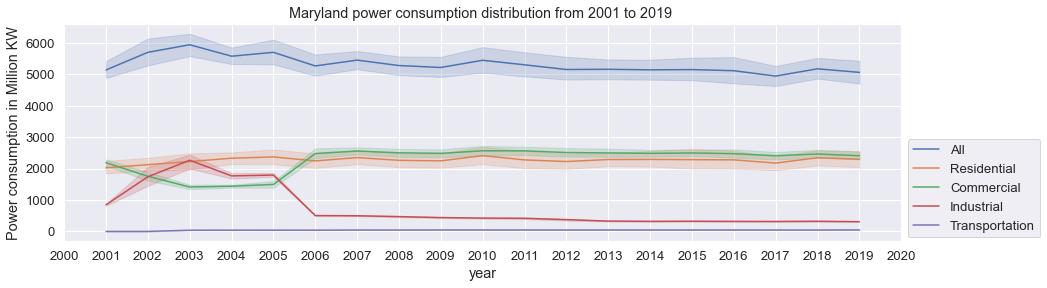

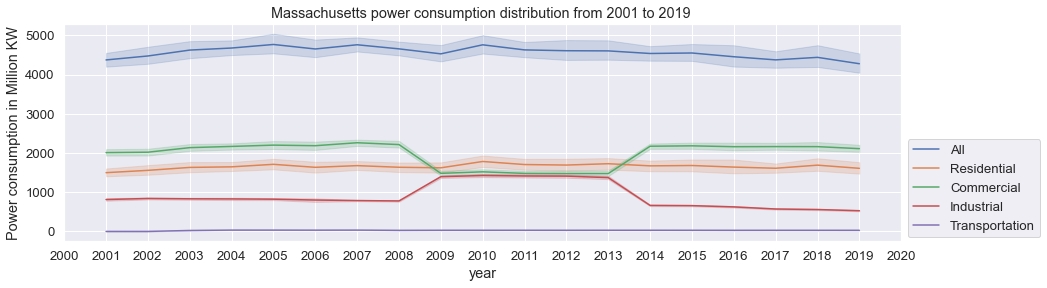

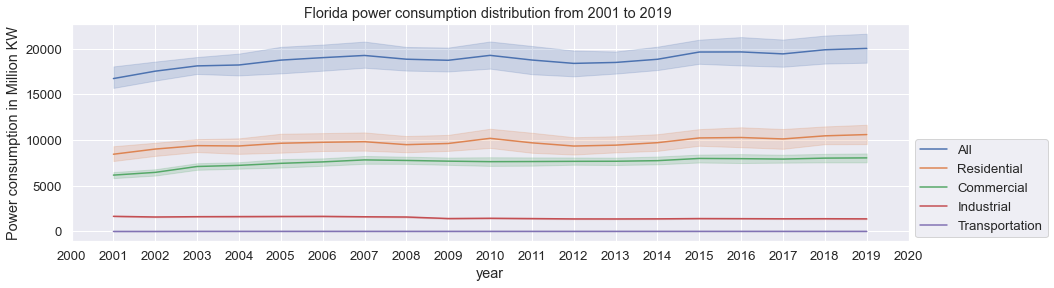

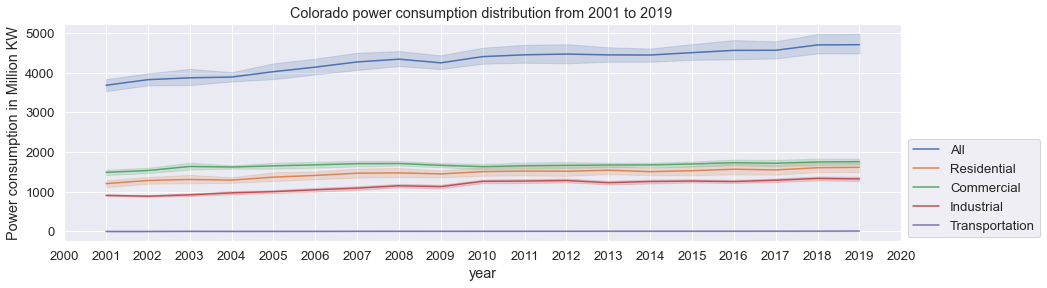

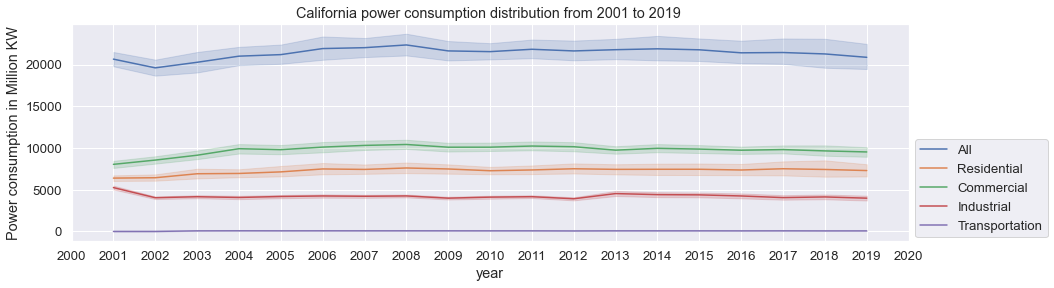

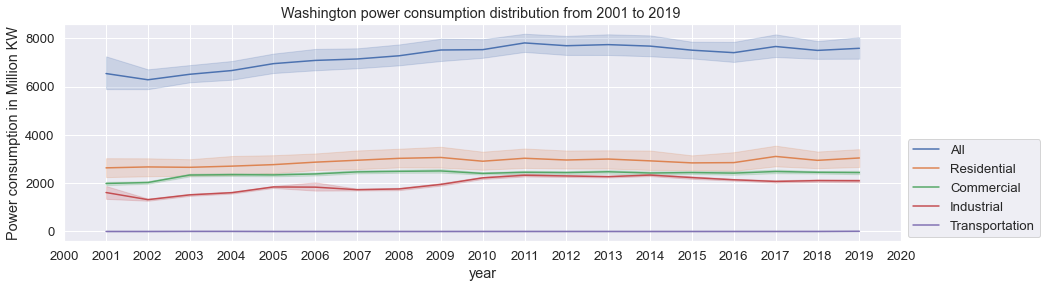

In [47]:
sns.set(font_scale=(1.2))
#Visualizing the power consumption during 2001 - 2019 across various sectors per state
for z in list_of_states:
    plt.figure(figsize=(15,4))
    for p in ["All","Residential","Commercial","Industrial","Transportation"]:
        sns.lineplot(data=power_temp_data[(power_temp_data["state"]==z)&(power_temp_data["year"]<2020)],x="year",y=p,label=p)
    plt.title(z+ " power consumption distribution from 2001 to 2019 ")
    plt.ylabel("Power consumption in Million KW")
    plt.legend(bbox_to_anchor=(1,0.5))
    plt.xticks(np.arange(2000,2021,1))
    plt.show()

Conclusions based on popwe consumption in each sector:

1] In Maryland, the residential sector consumption has been increasing from 2001 to 2006 and later has almost been steaady.

2] In Maryland, the commercial sector consumption dropped significantly from 2001 to 2005, and increased frastically over the next one year. Later, it has almost contant.

3] In Maryland, the industrial sector consumption had a high increase rate during 2001 to 2003, but later dropped significantly untill 2006 and is later continuing the downward trend.

4] In Maryland, overall we see a upward trend and maximum consumption in 2003 and later a descending trend.

5] In Massachusetts, the residential sector consumption has been steady over the period.

6] In Massachusetts, the commercial and industrial sector consumption has been steady except in the period 2008 to 2014. Intrestingly,in 2009 consumption of one sector dropped while the other increased and vice versa in 2014.

7] Overall consumption in Massachusetts has been in decreasing trend.

8] In Florida, residential and commercial sector power consumption in in increasing trend. Further, there is an overall increase of power consumption over the years.

9] Colarado has a steady increasing trend in all the sectors over the years of analysis.

10] In California, there is high increase of power consumption untill 2004 and then a increasing trend overall.

11] In Washington, there is a consistent increase of the industrial, commercial power consumption. Overall, there is an increasing trend of power consumption.

12] Transportation sector has the lease consumption in the range of 100 million KW in all the states of analysis

NOTE: Please note that I did not consider 2020 data in analysis, as we do not have the complete year data to compare with past years

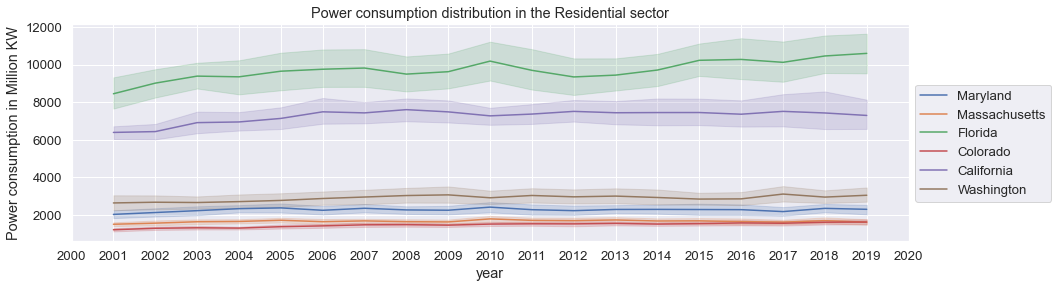

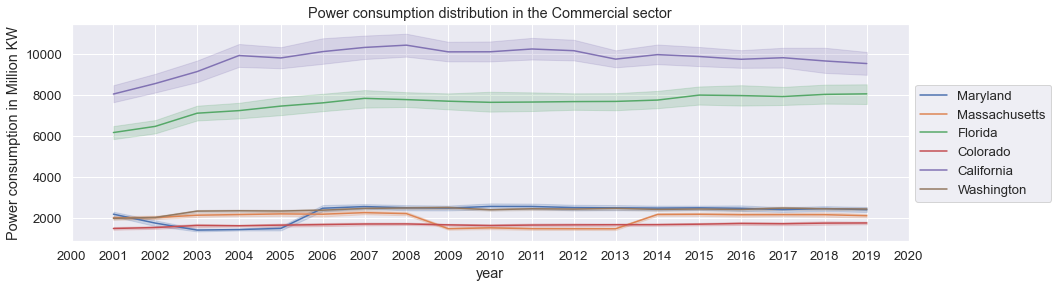

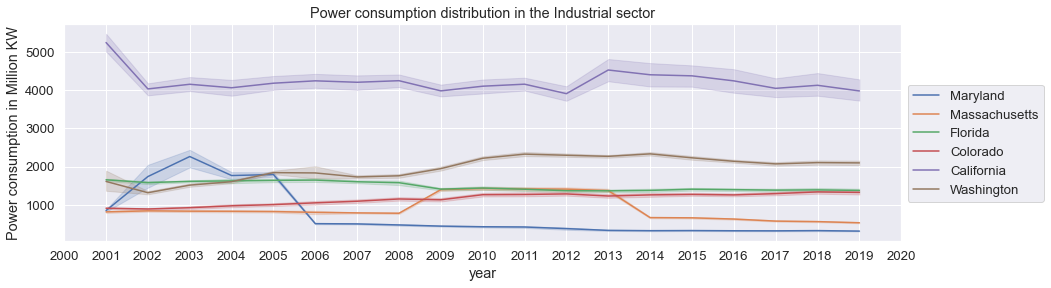

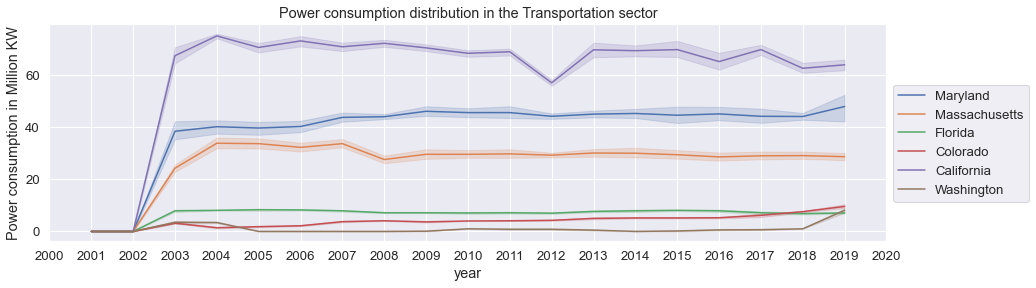

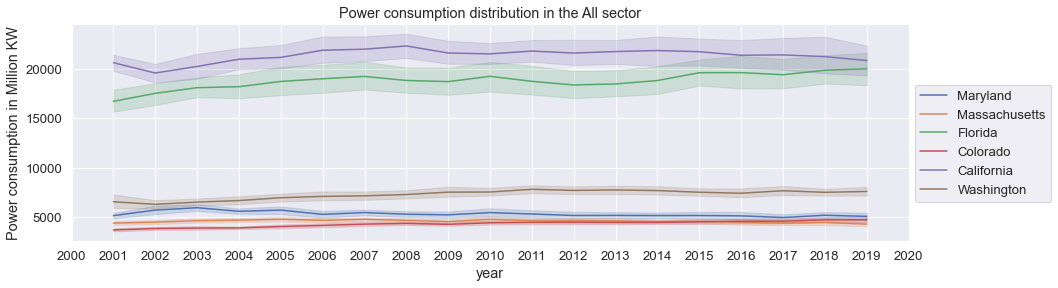

In [48]:
sectors_list = ["Residential","Commercial","Industrial","Transportation","All"]
#Visualizing the power consumption during each year since 2001

for t in sectors_list:
    plt.figure(figsize=(15,4))
    for z in list_of_states:
        sns.lineplot(data=power_temp_data[(power_temp_data["state"]==z)&(power_temp_data["year"]<2020)],x="year",y=t,label=z)
    plt.title("Power consumption distribution in the " + t + " sector")
    plt.ylabel("Power consumption in Million KW")
    plt.legend(bbox_to_anchor=(1,0.75))
    plt.xticks(np.arange(2000,2021,1))
    plt.show()

Conlusions based on each sector consumption in different states under analysis:
 
1] In the residential sector category, noticed that the Florida has the highest followed by California.

2] However, in commercial sector California is highest followed by Florida. Notably, massachusetts commercial consumptions dropped during 2009 to 2013 and reverted back from 2014.

3] California leads the industrial sector consumtion. However, we see a decreasing trend over the years. Further, one can see that Washington has a consistent increase of industrial power consumption.

4] Eventhough in Massachusetts, the commercial consumption dropped during 2008 to 2014, the industrial consumption increased specifically during that time period. However, the vice versa happened in Maryland.

5] In regards to transportation sector power consumption, I see that California is the highest followed by Maryland and Massachusetts. Washington has the least but has incresed a lot since, 2018.

6] In the recent years, noticed that Maryland, Massachusetts and Colarado have similar power consumtption range. Followed by Washington. However, observed that Florida and California have 4 times the power consumption of Maryland!


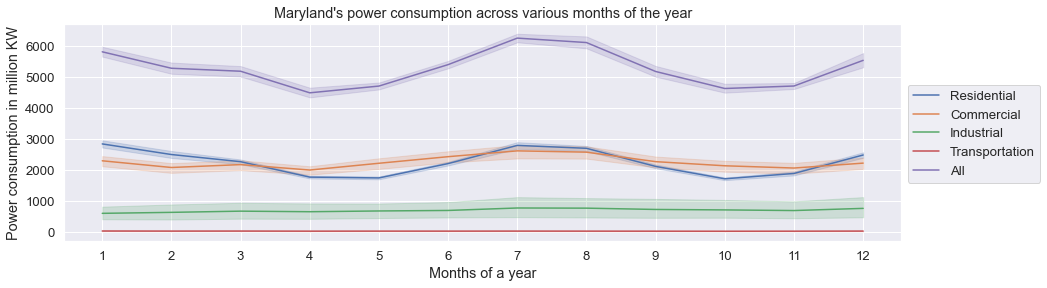

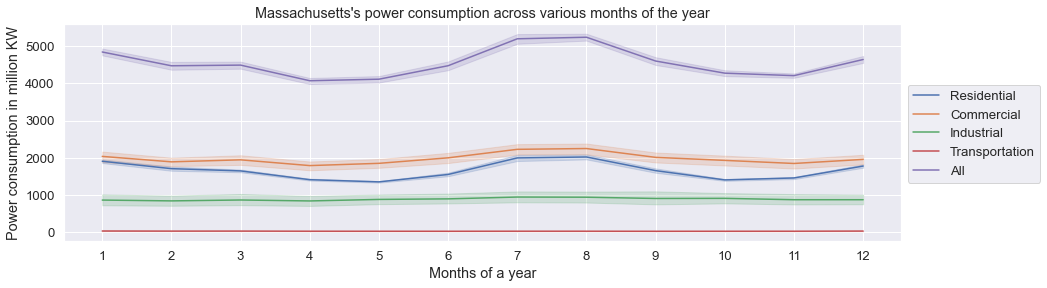

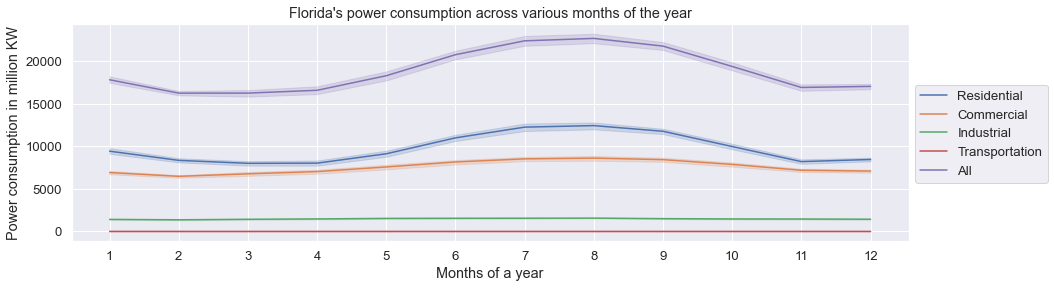

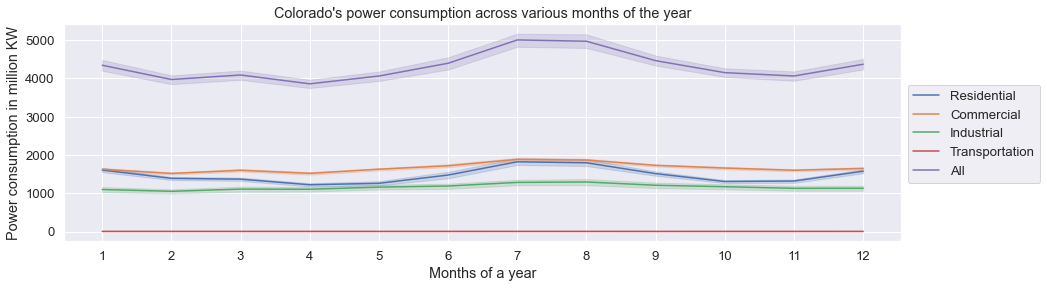

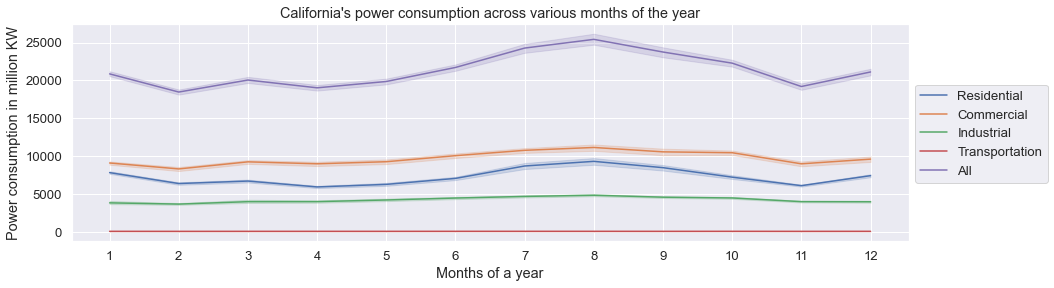

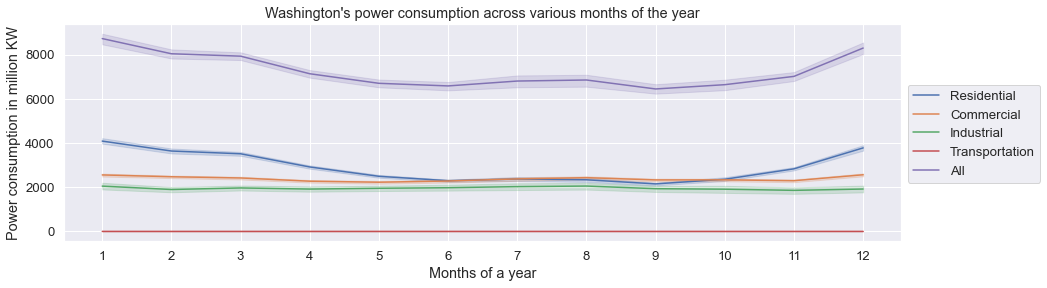

In [49]:

for z in list_of_states:
    plt.figure(figsize=(15,4))
    for a in sectors_list:
        sns.lineplot(x="month", y = a, data=power_temp_data[power_temp_data["state"]==z],label=a)
    plt.title(z+"'s power consumption across various months of the year")
    plt.ylabel("Power consumption in million KW")
    plt.xlabel("Months of a year")
    plt.legend(bbox_to_anchor=(1,0.75))
    plt.xticks(np.arange(1,13,1))
    plt.show()
    

Conclusions about power consumption in different months of year:

1] In all the states, industrial sector's consumption did not vary much based on the months of the year.

2] Maryland has its peak consumption during the months of January, July, August, December and the least month being April.

3] Masachusetts and Florida have a similar trend during various months of the year.

4] Florida on the other hand has a wide range of increased consumption season starting from April to November with the peak in July and August. Prominently, the spike is observed in the residential and slightly by the commercial sector.

5] Colarado and California also follow similar seasonality as Maryland.

6] Interestingly, Washington has a least consumption during the peak season of the other states considered under analysis. It has the maximum consumption during January, February and December. Again, mainly influenced by residential power consumption.


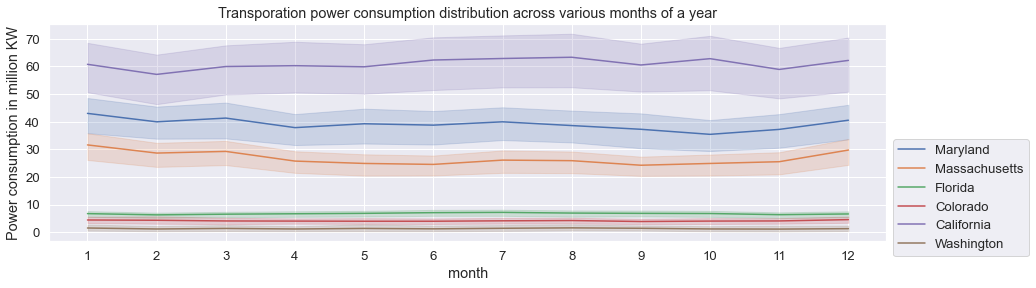

In [50]:
#As the scale of Transportation is much lower than the other sectors, it's season effects are not clear in the above graph.

#Hence, I am creating another visualization to understand the variation better.

plt.figure(figsize=(15,4))
for z in list_of_states:
    sns.lineplot(data=power_temp_data[power_temp_data["state"]==z],y="Transportation",x="month",label=z)
plt.title("Transporation power consumption distribution across various months of a year")
plt.xticks(np.arange(1,13,1))
plt.ylabel("Power consumption in million KW")
plt.legend(bbox_to_anchor=(1,0.5))
plt.show()
    

One can notice that there is no variation in the transportation sector power consumption in Florida, Colarado and Washington states.

We see a slight variation in Maryland and Masachusetts, with peak during December, January and March.

California has almost a steady state behaviour with least during February and November.

### How does power consumption vary based on average temperature of the state?

In [51]:
"""
As the power consumption and temperature are scales are very different, 
so I creating a function to scale all the values of a feature to a range of 0 and 1
"""

def scaling(series):
    lt = []
    max_val= series.max()
    min_val = series.min()
    
    for val in series:
        new_val = (val-min_val)/(max_val-min_val)
        lt.append(new_val)
    return pd.Series(lt)

In [52]:
power_temp_data.head(3)

,index,All,Residential,Commercial,Industrial,Transportation,Other,month,year,state,Date,temperature,temperature_anomaly
0,2001-01-01,5921,2782,2253,809,0.0,76,1,2001,Maryland,2001-01-01,32.2,-0.2
1,2001-02-01,4954,2214,1911,759,0.0,70,2,2001,Maryland,2001-02-01,38.0,4.2
2,2001-03-01,5367,2119,2267,888,0.0,93,3,2001,Maryland,2001-03-01,40.4,-2.1


In [53]:
for a in ['All', 'Residential', 'Commercial', 'Industrial', 'Transportation',"temperature"]:
    power_temp_data[a+"_scaled"] = scaling(power_temp_data[a])

In [54]:
power_temp_data.head(3)

,index,All,Residential,Commercial,Industrial,Transportation,Other,month,year,state,Date,temperature,temperature_anomaly,All_scaled,Residential_scaled,Commercial_scaled,Industrial_scaled,Transportation_scaled,temperature_scaled
0,2001-01-01,5921,2782,2253,809,0.0,76,1,2001,Maryland,2001-01-01,32.2,-0.2,0.099778,0.135752,0.088879,0.097561,0.0,0.253602
1,2001-02-01,4954,2214,1911,759,0.0,70,2,2001,Maryland,2001-02-01,38.0,4.2,0.063437,0.092555,0.058330,0.088724,0.0,0.337176
2,2001-03-01,5367,2119,2267,888,0.0,93,3,2001,Maryland,2001-03-01,40.4,-2.1,0.078958,0.085330,0.090130,0.111524,0.0,0.371758


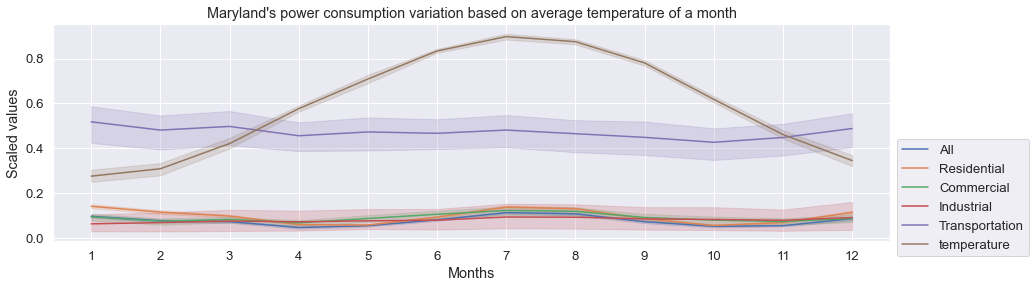

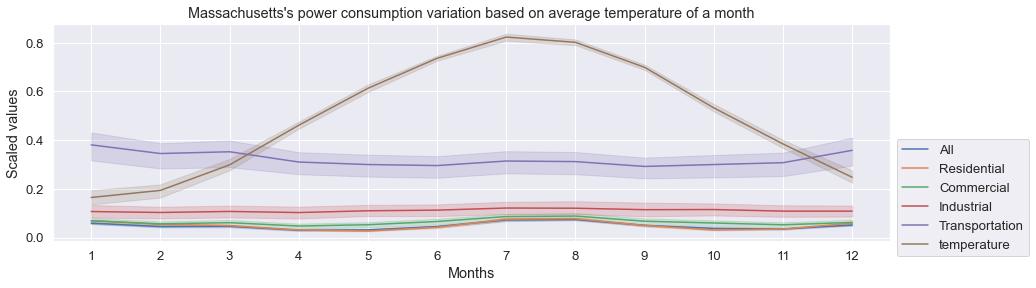

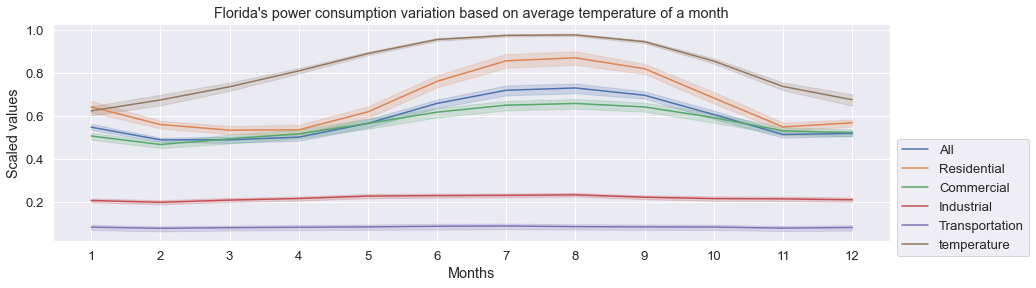

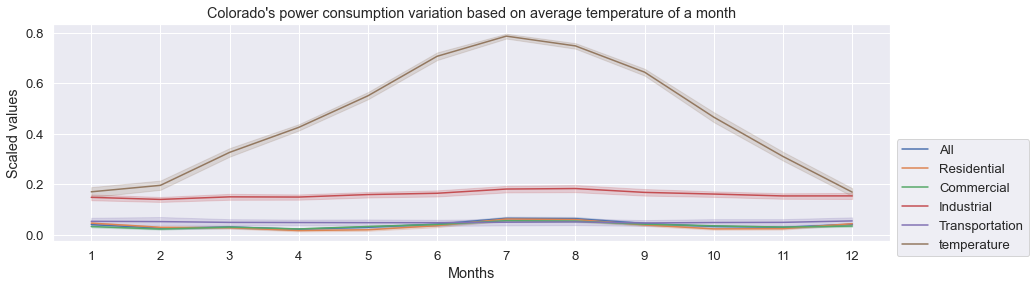

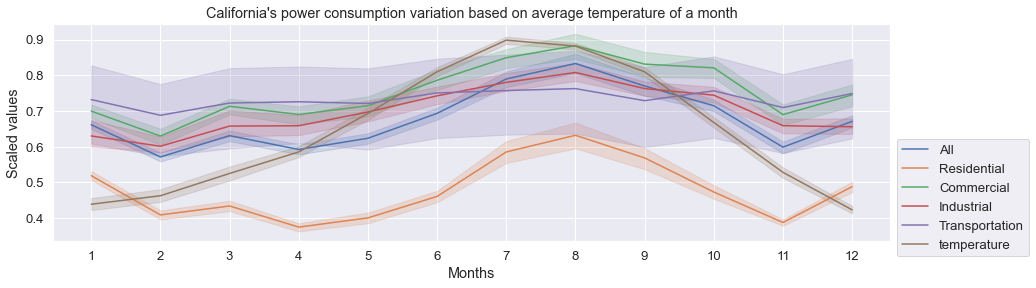

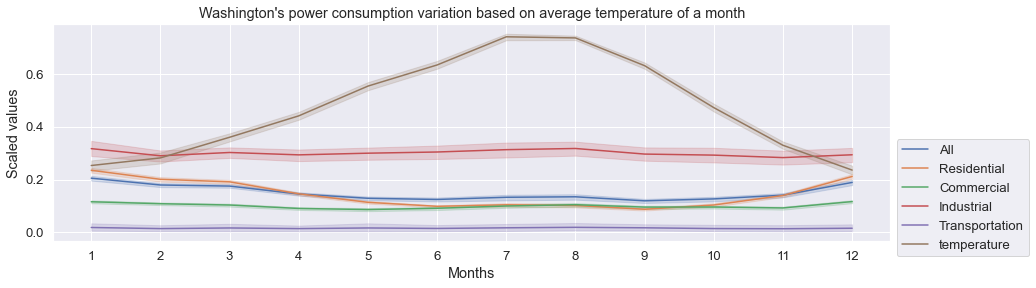

In [55]:
for z in list_of_states:
    plt.figure(figsize=(15,4))
    for a in ['All_scaled', 'Residential_scaled', 'Commercial_scaled',
              'Industrial_scaled', 'Transportation_scaled',"temperature_scaled"]:
        sns.lineplot(data=power_temp_data[power_temp_data["state"]==z],x="month",y=a,label=a.split("_")[0])
    plt.title(z+"'s power consumption variation based on average temperature of a month")
    plt.legend(bbox_to_anchor=(1,0.5))
    plt.ylabel("Scaled values")
    plt.xlabel("Months")
    plt.xticks(np.arange(1,13,1))
    plt.show()

Conclusiong about the power consumption based on fluctuations in temperature:

1] In Maryland, there is no significant change in power consumption based on changes in temperature during various months of the year. Noticed a slight increase in power consumption when the temperature drops, mainly contributed by residential and transportation sectors.

2] Massachusetts power consumption pattern is similar to Maryland, with slight increase when the temprature drops else almost no change.

3] Florida on the other hand, has a stong positive correlation between temperature and the power consumption especially in the residential sector, followed by commercial leading to a significant overall power consumption variation.

4] Colaroda has almost no change in power consumption with variation in temperature, similar to Maryland.

5] California had a prominent variotion of power consumption with the changes in temperature. With residential sctor showing the maximum change with temperature, all other sectors also show a observable pattern.

6] In contrast, Washington state power consumption decreases with increase in temperature, with maximum flusctuation being observed in residential sector.


### Analyzing the anomalies in temperatures

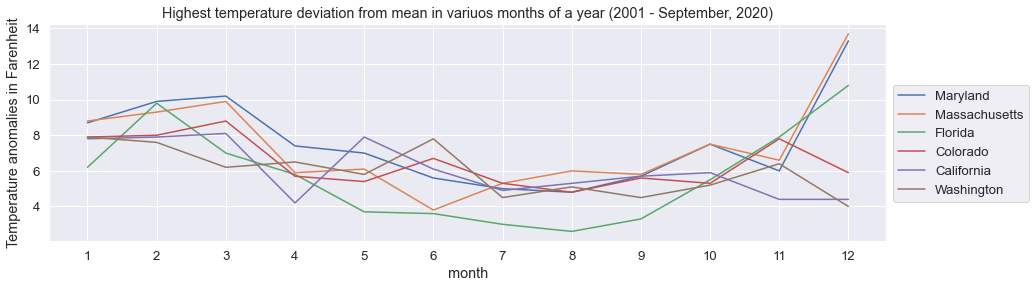

In [56]:
plt.figure(figsize=(15,4))

#Plotting the fluctuations from their mean temperature by considering the eastimator as max function instead of mean in each month
sns.lineplot(data=power_temp_data, x="month",y="temperature_anomaly",hue="state",ci=None,estimator=max)
plt.legend(bbox_to_anchor=(1,0.75))
plt.ylabel("Temperature anomalies in Farenheit")
plt.xticks(np.arange(1,13,1))
plt.title("Highest temperature deviation from mean in variuos months of a year (2001 - September, 2020)")
plt.show()

Based on the above visualization, one can conclude that

East coast states - Maryland, Massachusetts and Florida have higher deviation from mean temperature especially in the months of  February, March and December.

Florida has the least deviation from mean during the period May to September.

Waet coast states - California and Washington displayed the most deviation in the months of May and June.

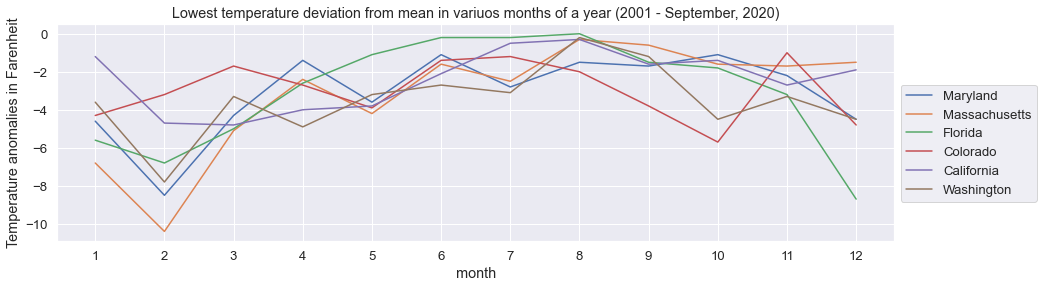

In [57]:
plt.figure(figsize=(15,4))
#Plotting the fluctuations from their mean temperature by considering the eastimator as min function instead of mean in each month
sns.lineplot(data=power_temp_data, x="month",y="temperature_anomaly",hue="state",ci=None,estimator=min)
plt.legend(bbox_to_anchor=(1,0.75))
plt.ylabel("Temperature anomalies in Farenheit")
plt.xticks(np.arange(1,13,1))
plt.title("Lowest temperature deviation from mean in variuos months of a year (2001 - September, 2020)")
plt.show()

Based on the above visualization, one can conclude that

East coast states - Maryland and Massachusetts have higher deviation from mean temperature especially in the month of February.

Florida has the most deviation from mean in December.

Waet coast states - Washington displayed the most deviation in February same as Maryland.

### Comparing the power consumption in 2019 to 2020; How the COVID-19 pandemic impacted each sector?

In [58]:
power_temp_data[power_temp_data["year"]==2020]["month"].max()

9

As for the current year, 2020 - I only have data untill September. 
Hence, I shall compare January - September period of 2019 with 2020

In [59]:
data_2020 = power_temp_data[power_temp_data["year"]==2020]
data_2019 = power_temp_data[(power_temp_data["year"]==2019)&(~power_temp_data["month"].isin( [10,11,12]))]

In [60]:
#Confirming the only the first three quarters are only included in the analysis
print("2020 year's months included are: ",data_2020["month"].unique())
print("2019 year's months included are: ",data_2019["month"].unique())

2020 year's months included are:  [1 2 3 4 5 6 7 8 9]
2019 year's months included are:  [1 2 3 4 5 6 7 8 9]


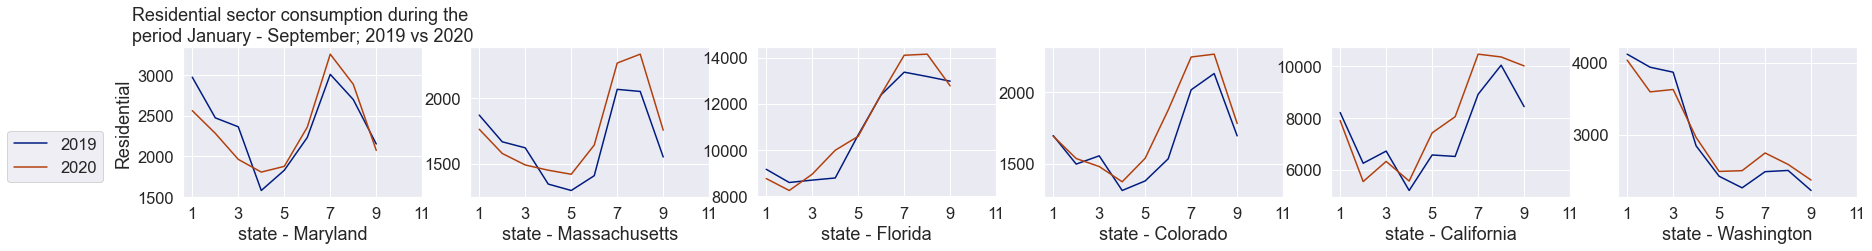

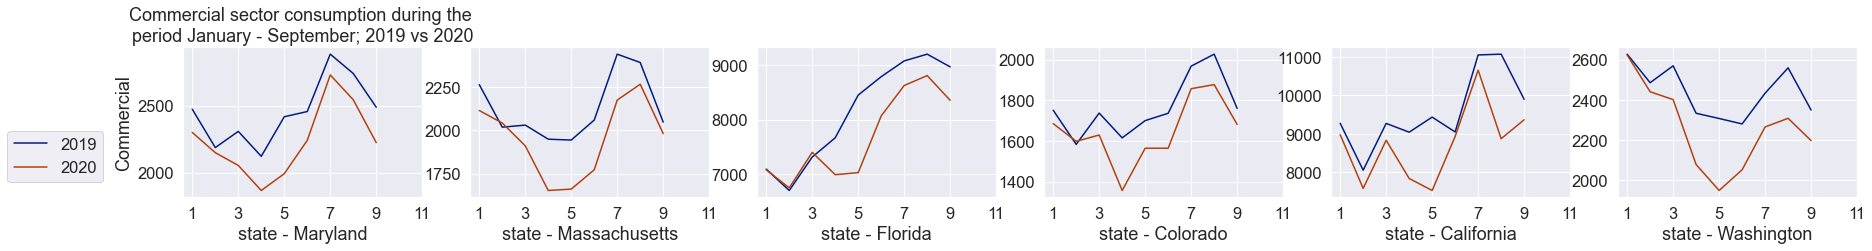

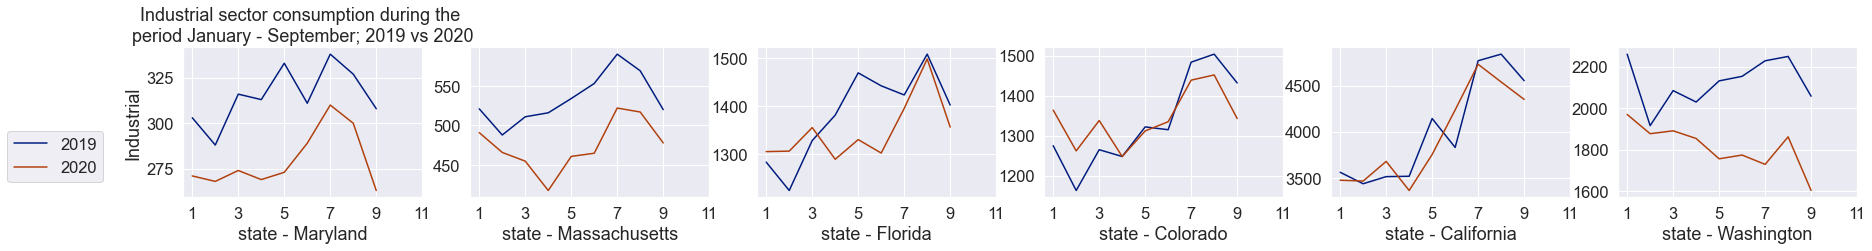

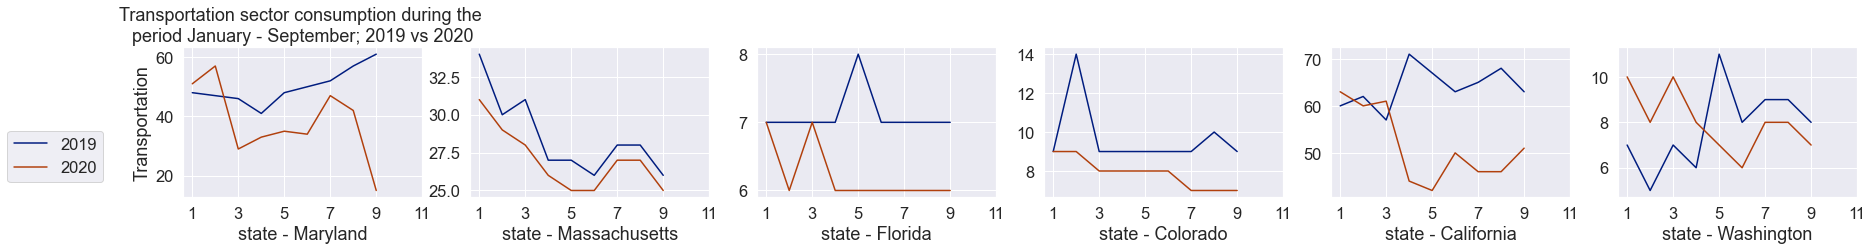

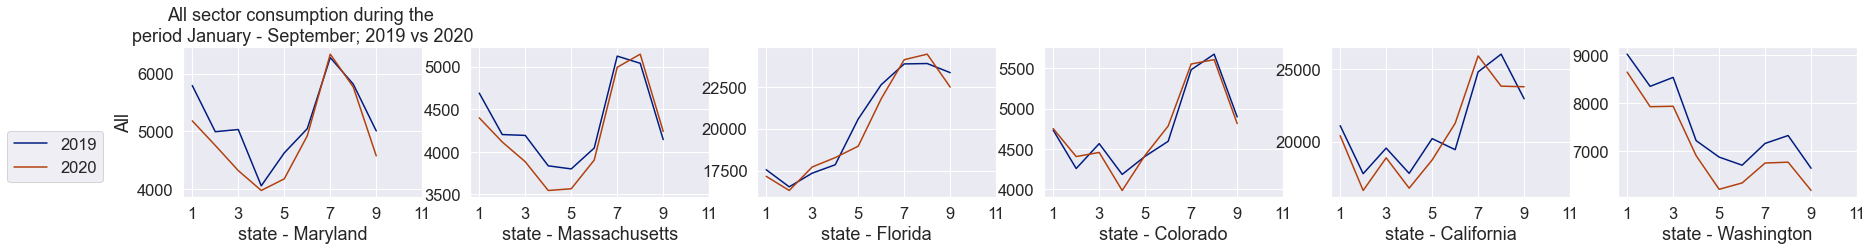

In [61]:
data_p1 = pd.concat([data_2020,data_2019])
sns.set(font_scale=1.5)

for a in ['Residential', 'Commercial', 'Industrial', 'Transportation','All']:
    plt.figure(figsize=(30,16))
    
    for z,p in zip(list_of_states , range(1,26,1)):
    
        sns.lineplot(data=data_p1[data_p1["state"]==z],x="month", y=a,hue="year",palette="dark",ax=plt.subplot(5,6,p))
        plt.xlabel("state - "+z)
        plt.xticks(range(1,13,2))
        if(p%6!=1):
            plt.ylabel("")
            plt.legend().set_visible(False) 
        else:
            plt.title(a+" sector consumption during the \nperiod January - September; 2019 vs 2020",loc="center")
            plt.legend(bbox_to_anchor=(-0.3,0.5))
 
    plt.show()
    

Conclusions on how COVID-19 pandemic lockdown and post-lockdown has impacted power consumption in each sector:

Since the start of pandemic in March, 2020 - I see an increase in residential sector power consumption especially in Colarado, California and Massachusetts.

Commercial, Industrail and Transportation sector's power consumption dropped a lot during 2020 in comparison to 2019.

However, eventhough overall consumption decreased during the start of the pandemic, since july states like Florida, Massachusetts, California power consumption is nearly same or more than that in 2019

### Analyzing the correlation between temperature and power consumption

In [62]:
power_temp_data.head(3)

,index,All,Residential,Commercial,Industrial,Transportation,Other,month,year,state,Date,temperature,temperature_anomaly,All_scaled,Residential_scaled,Commercial_scaled,Industrial_scaled,Transportation_scaled,temperature_scaled
0,2001-01-01,5921,2782,2253,809,0.0,76,1,2001,Maryland,2001-01-01,32.2,-0.2,0.099778,0.135752,0.088879,0.097561,0.0,0.253602
1,2001-02-01,4954,2214,1911,759,0.0,70,2,2001,Maryland,2001-02-01,38.0,4.2,0.063437,0.092555,0.058330,0.088724,0.0,0.337176
2,2001-03-01,5367,2119,2267,888,0.0,93,3,2001,Maryland,2001-03-01,40.4,-2.1,0.078958,0.085330,0.090130,0.111524,0.0,0.371758


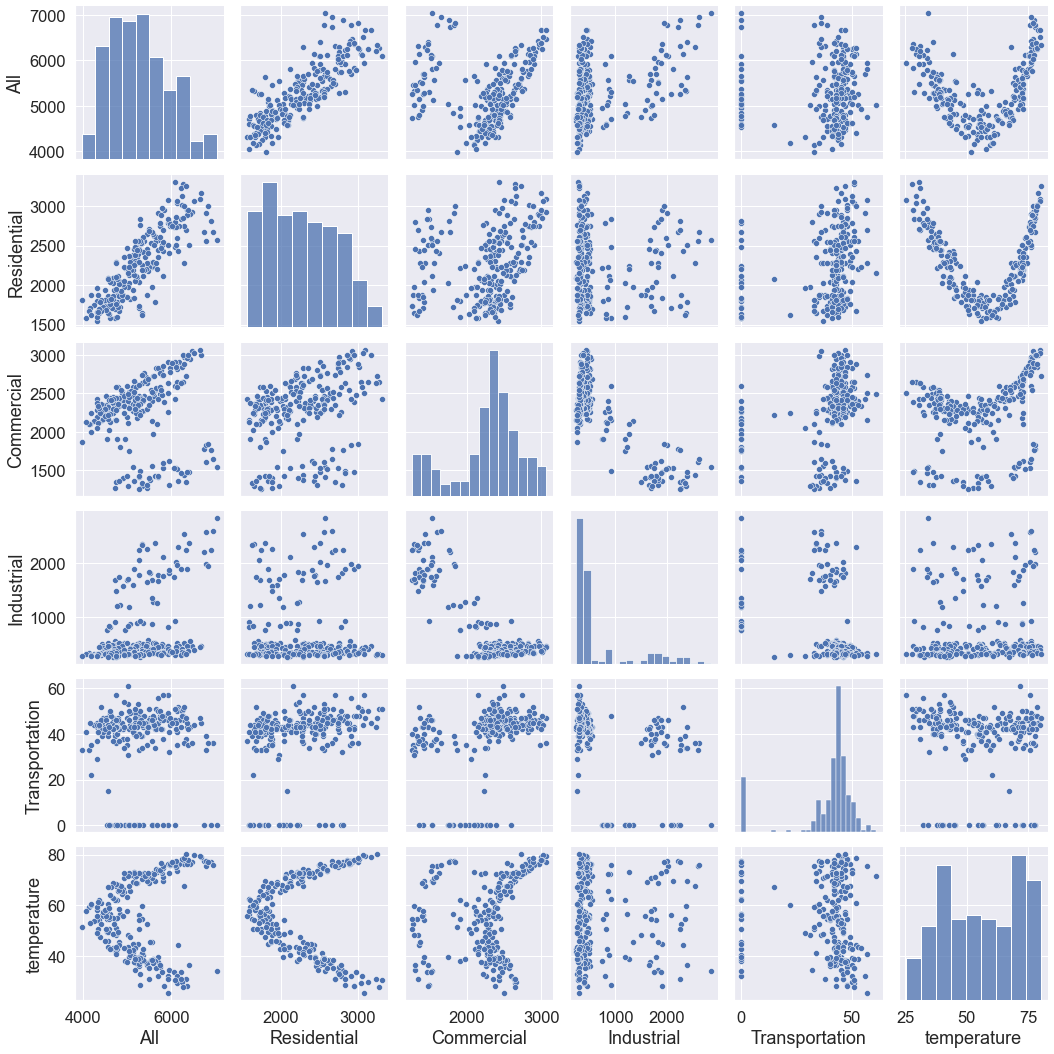

In [63]:
#Generating a pairwise plot to compare the relation ship between temperature and various sector consumption
sns.pairplot(power_temp_data[power_temp_data["state"]=="Maryland"][["All","Residential","Commercial","Industrial","Transportation","temperature"]])
plt.show()

From the last row in the pair plot, I notice that temperature has a non linear relationship with All, Residential, Commercial sectors.

Also, no strong relationship is noticed between temperature and industrial, transportation sectors

Hence, I will divide the complete data into two parts at temperature 60 - as the parabola seems to centered at around 60

In [64]:
# Unsing spearman correlation as the relationship is monotonically increasing

print("Correlation or impact of Maryland temperature on various sector power consumption (2001 - 2019, temperature > 60F): ")
print(power_temp_data[(power_temp_data["state"]=="Maryland")&(power_temp_data["temperature"]>60)].loc[:,["All","Residential","Commercial","Industrial","Transportation","temperature"]].corr(method="spearman")["temperature"])

Correlation or impact of Maryland temperature on various sector power consumption (2001 - 2019, temperature > 60F): 
All               0.897379
Residential       0.947221
Commercial        0.542215
Industrial        0.103680
Transportation    0.158382
temperature       1.000000
Name: temperature, dtype: float64


Noticed that when the tempreature is above 60 F, power consumption of all the sectors have a positive correlation with temperature, with the maximum being Residential sector 

In [65]:
# Unsing spearman correlation as the relationship is monotonically decreasing
print("Correlation or impact of Maryland temperature on various sector power consumption (2001 - 2019, temperature <= 60F): ")
print(power_temp_data[(power_temp_data["state"]=="Maryland")&(power_temp_data["temperature"]<=60)].loc[:,["All","Residential","Commercial","Industrial","Transportation","temperature"]].corr(method="spearman")["temperature"])

Correlation or impact of Maryland temperature on various sector power consumption (2001 - 2019, temperature <= 60F): 
All              -0.796508
Residential      -0.942530
Commercial       -0.334858
Industrial        0.089961
Transportation   -0.394067
temperature       1.000000
Name: temperature, dtype: float64


Noticed that when the tempreature is below 60 F, power consumption of all the sectors have a negative correlation with temperature, with the maximum being Residential sector!

## Analyzing the auto-correlation of power consumption

In [66]:
! pip install statsmodels
from statsmodels.graphics.tsaplots import plot_acf

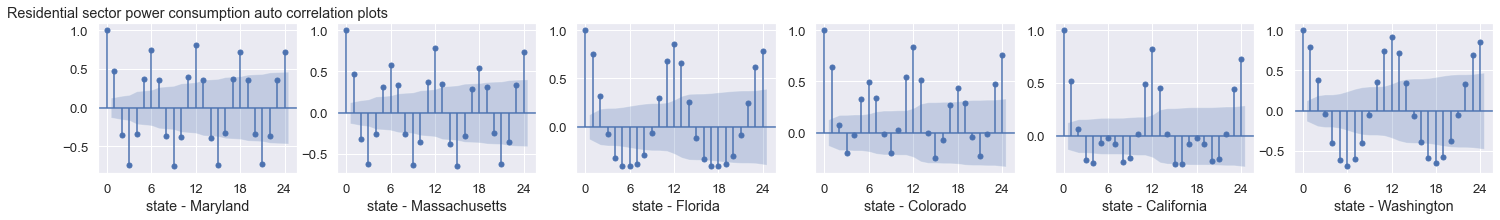

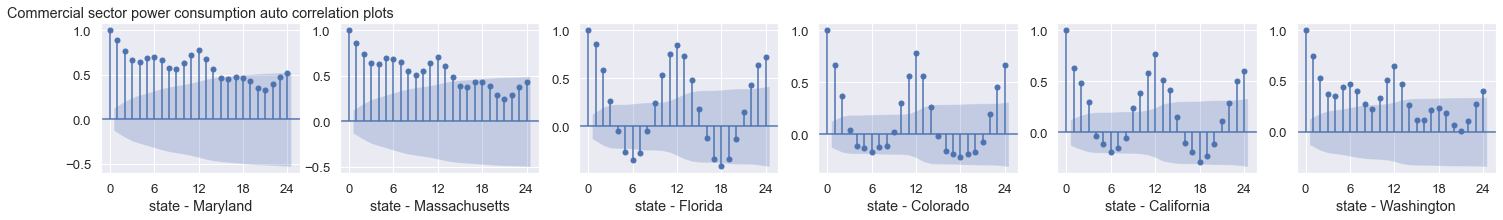

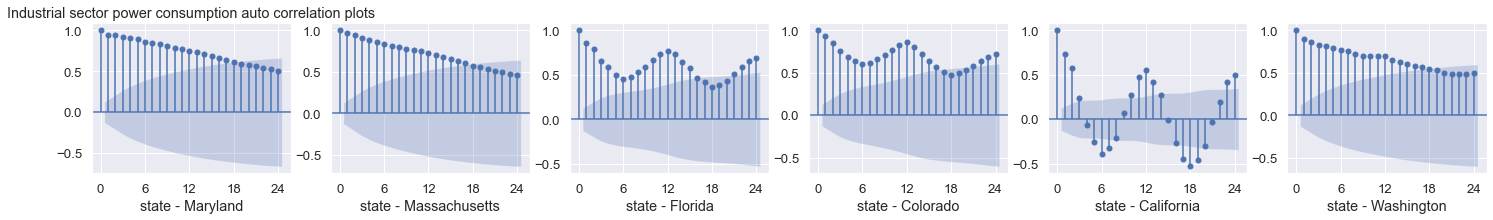

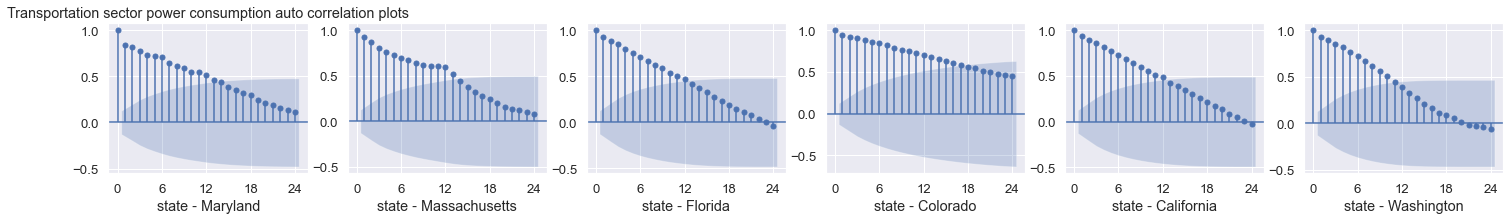

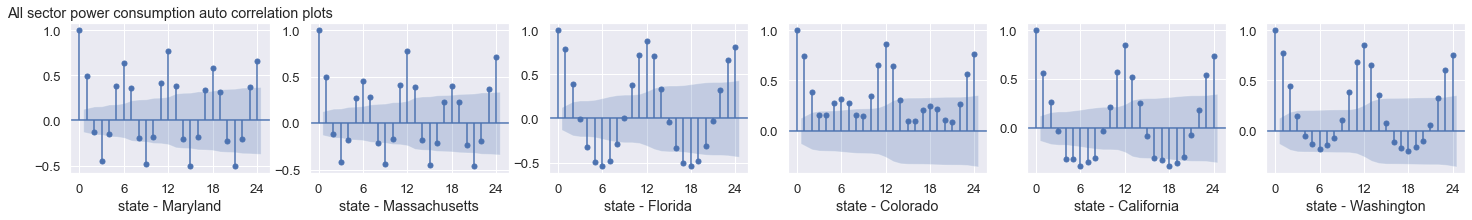

In [67]:
#Creating a plot to compare the autocorrelation in various sectors in the states under analyses
sns.set(font_scale=1.2)

for a in ['Residential', 'Commercial', 'Industrial', 'Transportation','All']:
    plt.figure(figsize=(25,16))
    
    for z,p in zip(list_of_states , range(1,26,1)):
    
        plot_acf(power_temp_data[power_temp_data["state"]==z][a],ax=plt.subplot(5,6,p))
        plt.xlabel("state - "+z)
        plt.xticks([0,6,12,18,24])
        if(p%6!=1):
            plt.ylabel("")
            plt.title("")
        else:
            plt.title(a+" sector power consumption auto correlation plots",loc="center")
 
    plt.show()
    

Auto correlation based conclusions:

1] With respect to residential sector power consumption, Maryland, Massachusetts and Colarado are following a similar pattern with highest correlation at 12 months, but a nearly strong auto correlation at around 6 months lag.

2] Florida and Washington, have a high positive auto correlation for every 12 months and a strong negative correlation at every 6 month period.

3] However, on comparing the commercial sector consumption Maryland, Massachusetts and Washington are having positive auto correlation with maximum at 12 month lag.

4] Florida has the maximum commercial sector power consumption fluctuation with negative correlation at 6 months and a positive correlation at 12 months. Colarado and California also follow a similar pattern but not as strong as Florida.

5] Industrial sector power consumption does not display a pattern in Maryland, Massachusetts and Washington. Florida and Colorado display a cyclic pattern with most auto correlation at 12 month lag, however California is having a positive correlation on 12 month lag and negative correlation on 6 month lag.

6] Transportation sector has no auto correlation for any of the states under analysis.

Overall, one can observe significant auto correlation for every 1 year period!

================================================================================================================

### End note:

As part of the project, I collected the power consumption and temperature data. 
Then, cleaned it and merged them based on state, month and year.

Later, performed exploratory data analysis of how the power consumption varies since 2001. 
Further, analysed how the power consumption differs in various sectors in different months of year.

Then, analyzed how the power consumption across various sectors has been impacted due to COVID-19 pandemic by comparing the data with that of 2019.

Then understood the correlation between temperature and power consumption in the various sectors of Maryland.

Finally, analyzed the auto correlations acorss the various sectors in the six states considered for analysis.